<a href="https://colab.research.google.com/github/Cristi63/Proyecto-Challenge-ONE/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda3.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175


#1. Análisis de facturación



In [4]:
precios = [sum(tienda.Precio) + sum(tienda2.Precio) + sum(tienda3.Precio) + sum(tienda4.Precio)]
suma = sum(precios)
print('el ingreso total es {:,.2f}'.format(suma).replace(",", "@").replace(".", ",").replace("@", "."))
print('El total tienda1 es {:,.2f}'.format(sum(tienda.Precio)).replace(",", "@").replace(".", ",").replace("@", "."))
print('El total tienda2 es {:,.2f}'.format(sum(tienda2.Precio)).replace(",", "@").replace(".", ",").replace("@", "."))
print('El total tienda3 es {:,.2f}'.format(sum(tienda3.Precio)).replace(",", "@").replace(".", ",").replace("@", "."))
print('El total tienda4 es {:,.2f}'.format(sum(tienda4.Precio)).replace(",", "@").replace(".", ",").replace("@", "."))

el ingreso total es 4.403.619.200,00
El total tienda1 es 1.150.880.400,00
El total tienda2 es 1.116.343.500,00
El total tienda3 es 1.098.019.600,00
El total tienda4 es 1.038.375.700,00


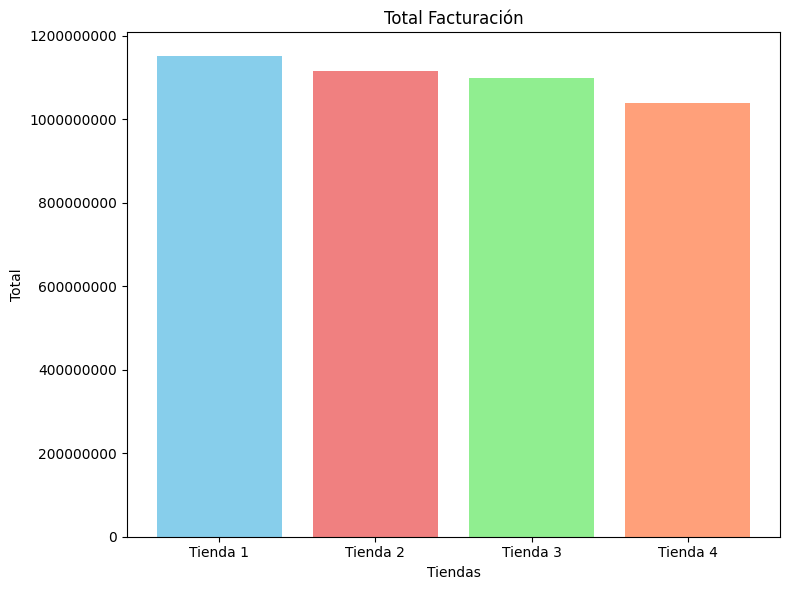

In [23]:
import matplotlib.pyplot as plt

# Datos de las tiendas y sus totales
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
totales = [1150880400, 1116343500, 1098019600, 1038375700]

# Lista de colores para cada barra
colores = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']

# Crear el gráfico de barras con colores individuales
plt.figure(figsize=(8, 6))
plt.bar(tiendas, totales, color=colores)

# Añadir etiquetas y título
plt.xlabel("Tiendas")
plt.ylabel("Total")
plt.title("Total Facturación")

# Formatear los valores del eje Y
plt.ticklabel_format(style='plain', axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [24]:
def obtener_popularidad_contando(df_tienda, nombre_tienda):
    """Calcula las ventas por categoría (contando filas) y la categoría más popular para una tienda."""
    ventas_por_categoria = df_tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
    ventas_ordenadas = ventas_por_categoria.sort_values(by='Cantidad Vendida', ascending=False)
    categoria_mas_popular = ventas_ordenadas.iloc[0]
    return {'Tienda': nombre_tienda,
            'Categoría Más Popular': categoria_mas_popular['Categoría del Producto'],
            'Cantidad Vendida (Más Popular)': categoria_mas_popular ['Cantidad Vendida']}

# Calcular para cada tienda
popularidad_a = obtener_popularidad_contando(tienda, '1')
popularidad_b = obtener_popularidad_contando(tienda2, '2')
popularidad_c = obtener_popularidad_contando(tienda3, '3')
popularidad_d = obtener_popularidad_contando(tienda4, '4')


# Mostrar los resultados
print("\nResultados de popularidad por tienda (contando filas):")
print(popularidad_a)
print(popularidad_b)
print(popularidad_c)
print(popularidad_d)



Resultados de popularidad por tienda (contando filas):
{'Tienda': '1', 'Categoría Más Popular': 'Muebles', 'Cantidad Vendida (Más Popular)': np.int64(465)}
{'Tienda': '2', 'Categoría Más Popular': 'Muebles', 'Cantidad Vendida (Más Popular)': np.int64(442)}
{'Tienda': '3', 'Categoría Más Popular': 'Muebles', 'Cantidad Vendida (Más Popular)': np.int64(499)}
{'Tienda': '4', 'Categoría Más Popular': 'Muebles', 'Cantidad Vendida (Más Popular)': np.int64(480)}


# 3. Calificación promedio de la tienda


In [6]:
# Agregar a las tiendas la columna Tienda

tienda['Tienda'] = '1'
tienda2['Tienda'] = '2'
tienda3['Tienda'] = '3'
tienda4['Tienda'] = '4'

In [17]:
# Especificar la tienda para calcular el promedio
# Agregar la columna Tienda a las tiendas

tienda_analizar = '4'
df_tienda = tienda4

calificaciones_tienda = df_tienda[df_tienda['Tienda'] == tienda_analizar]

# Calcular la calificación promedio de la tienda
calificacion_promedio_tienda = calificaciones_tienda['Calificación'].mean()

print(f"\nLa calificación promedio de la Tienda {tienda_analizar} es: {calificacion_promedio_tienda:.2f}")


La calificación promedio de la Tienda 4 es: 4.00


In [13]:
def obtener_calificacion_promedio(df_tienda, tienda_analizar):
    calificaciones_tienda = df_tienda[df_tienda['Tienda'] == tienda_analizar]
    # Calcular la calificación promedio de la tienda
    calificacion_promedio_tienda = calificaciones_tienda['Calificación'].mean()
    return {calificacion_promedio_tienda}

# Calcular para cada tienda
calificacion_1 = obtener_calificacion_promedio(tienda, '1')
calificacion_2 = obtener_calificacion_promedio(tienda2, '2')
calificacion_3 = obtener_calificacion_promedio(tienda3, '3')
calificacion_4 = obtener_calificacion_promedio(tienda4, '4')


# Mostrar los resultados
print("\nResultados calificación promedio por tienda:")
print(calificacion_1)
print(calificacion_2)
print(calificacion_3)
print(calificacion_4)


Resultados calificación promedio por tienda:
{np.float64(3.976685036032217)}
{np.float64(4.037303942348453)}
{np.float64(4.048325561678677)}
{np.float64(3.9957591178965224)}


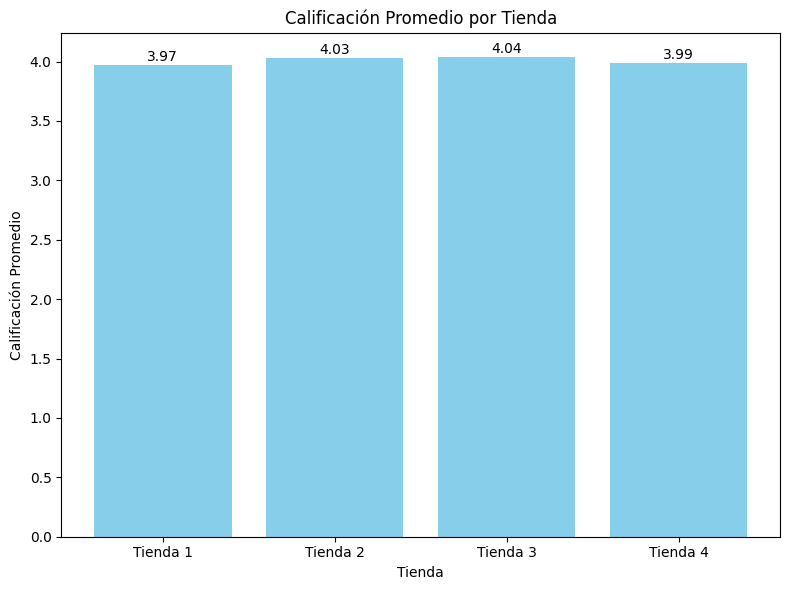

In [1]:
import matplotlib.pyplot as plt

# Datos de las tiendas y sus calificaciones promedio
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [3.97, 4.03, 4.04, 3.99]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(tiendas, calificaciones_promedio, color='skyblue')

# Añadir etiquetas y título
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.title("Calificación Promedio por Tienda")

# Añadir los valores en la parte superior de cada barra (opcional)
for i, v in enumerate(calificaciones_promedio):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

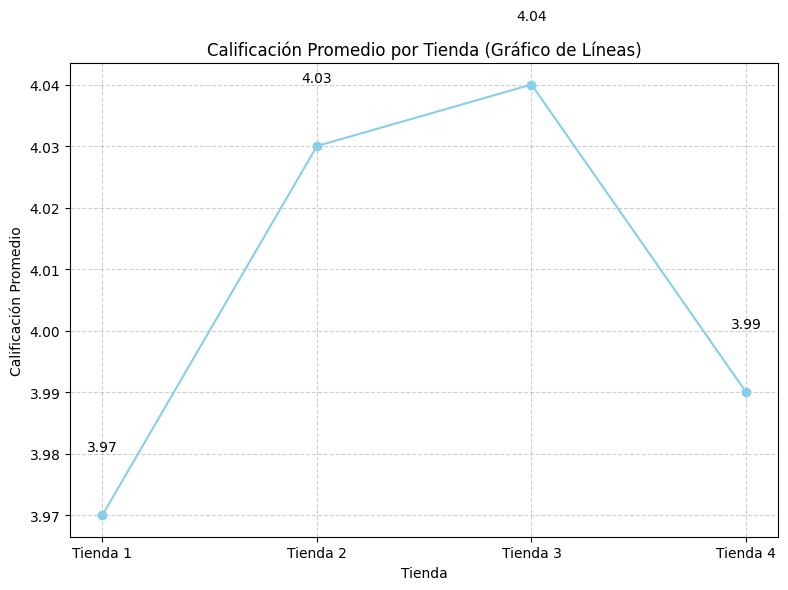

In [6]:
import matplotlib.pyplot as plt

# Datos de las tiendas y sus calificaciones promedio
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [3.97, 4.03, 4.04, 3.99]

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))
plt.plot(tiendas, calificaciones_promedio, marker='o', linestyle='-', color='skyblue')

# Añadir etiquetas y título
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.title("Calificación Promedio por Tienda (Gráfico de Líneas)")

# Añadir los valores en los puntos (opcional)
for i, v in enumerate(calificaciones_promedio):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.6) # Añadir una cuadrícula para facilitar la lectura (opcional)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [9]:
# Agrupar por Tienda y Producto y contar las ventas (solución parcial)

conteo_ventas = tienda.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')
ventas_ordenadas = conteo_ventas.sort_values(by='Cantidad Vendida', ascending=False)
print(ventas_ordenadas.iloc[0])


Tienda                    1
Producto            Armario
Cantidad Vendida         60
Name: 1, dtype: object


In [10]:
# Se une en una lista los cuatro tiendas para facilitar la iteración (solución global)
lista_de_dataframes = [tienda, tienda2, tienda3, tienda4]

# Lista para almacenar los resultados
resultados = []

# Para obtener los productos mas y menos vendidos
for i, df in enumerate(lista_de_dataframes):
    conteo_ventas = df.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')
    ventas_ordenadas = conteo_ventas.sort_values(by='Cantidad Vendida', ascending=False)
    resultado_df = ventas_ordenadas.iloc[0]

    producto_menos_vendido = conteo_ventas.sort_values(by='Cantidad Vendida')
    resultado_menos_vendido =  producto_menos_vendido.iloc[0]

    resultados.append(f"Resultado {i+1}: {resultado_df, resultado_menos_vendido}")

    # Imprimir los resultados finales después del bucle
    print("\n--- Resultado Productos mas vendidos ---")
    print(resultado_df)

    print("\n--- Resultado Productos menos vendidos ---")
    print(resultado_menos_vendido)



--- Resultado Productos mas vendidos ---
Tienda                    1
Producto            Armario
Cantidad Vendida         60
Name: 1, dtype: object

--- Resultado Productos menos vendidos ---
Tienda                                      1
Producto            Auriculares con micrófono
Cantidad Vendida                           33
Name: 4, dtype: object

--- Resultado Productos mas vendidos ---
Tienda                                      2
Producto            Iniciando en programación
Cantidad Vendida                           65
Name: 24, dtype: object

--- Resultado Productos menos vendidos ---
Tienda                          2
Producto            Juego de mesa
Cantidad Vendida               32
Name: 26, dtype: object

--- Resultado Productos mas vendidos ---
Tienda                          3
Producto            Kit de bancas
Cantidad Vendida               57
Name: 27, dtype: object

--- Resultado Productos menos vendidos ---
Tienda                                    3
Producto        


# 5. Envío promedio por tienda

In [18]:
def obtener_costo_promedio_tienda(df_tienda, tienda_analizar):
    obtener_tienda = df_tienda[df_tienda['Tienda'] == tienda_analizar]
    # Calcular costo envio promedio x tienda
    costo_promedio_tienda = obtener_tienda['Costo de envío'].mean()
    return {costo_promedio_tienda}

# Calcular para cada tienda
costo_medio_1 = obtener_costo_promedio_tienda(tienda, '1')
costo_medio_2 = obtener_costo_promedio_tienda(tienda2, '2')
costo_medio_3 = obtener_costo_promedio_tienda(tienda3, '3')
costo_medio_4 = obtener_costo_promedio_tienda(tienda4, '4')


# Mostrar los resultados
print("\nResultados costo promedio por tienda:")
print(costo_medio_1)
print(costo_medio_2)
print(costo_medio_3)
print(costo_medio_4)


Resultados costo promedio por tienda:
{np.float64(26018.60958033065)}
{np.float64(25216.235693090293)}
{np.float64(24805.680373039424)}
{np.float64(23459.457167090754)}


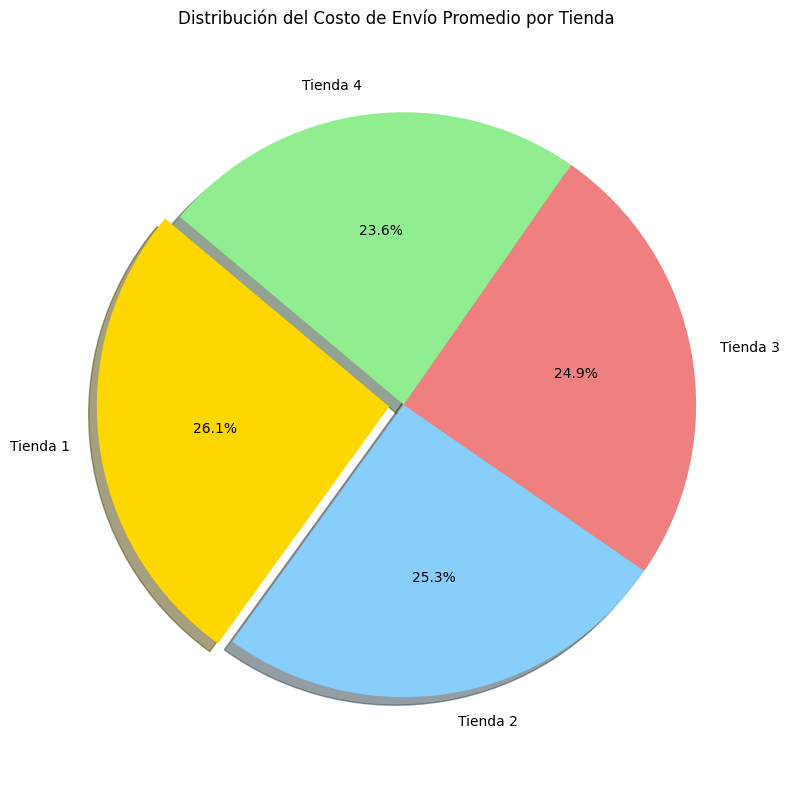

In [7]:
import matplotlib.pyplot as plt

# Datos de las tiendas y el costo de envío promedio
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_promedio = [26018.60, 25216.23, 24805.68, 23459.45]
colores = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen']
explode = (0.05, 0, 0, 0)  # Separa la primera porción ligeramente (opcional)

# Crear el gráfico pie
plt.figure(figsize=(8, 8))
plt.pie(costos_promedio,
        labels=tiendas,
        colors=colores,
        explode=explode,
        autopct='%1.1f%%',  # Formato para mostrar el porcentaje
        shadow=True,
        startangle=140)  # Ángulo de inicio para la primera porción (opcional)

plt.title('Distribución del Costo de Envío Promedio por Tienda')
plt.axis('equal')  # Asegura que el pie sea un círculo

plt.tight_layout()
plt.show()

**Informe: Análisis para la Decisión de Venta de Tienda**

*Introducción*

El propósito de este informe es analizar los datos de desempeño de cuatro tiendas para proporcionar una recomendación fundamentada al Sr. Juan sobre cuál tienda sería la más adecuada para vender. El análisis considerará varios factores clave, incluyendo facturación, ventas de la categoría más popular, calificación promedio de la tienda, productos más y menos vendidos, y el costo promedio por tienda, con el objetivo de identificar tanto las fortalezas como las debilidades de cada establecimiento.

*Desarrollo*

A continuación, se presenta un análisis comparativo de las cuatro tiendas basado en los datos proporcionados:

1. Facturación

Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700
Tienda 1 presenta la mayor facturación, seguida por Tienda 2, Tienda 3 y Tienda 4, que muestra la menor facturación.

2. Ventas por Categoría Más Popular (Muebles)

Tienda 1: 465
Tienda 2: 442
Tienda 3: 499
Tienda 4: 480
Tienda 3 lidera en ventas de la categoría más popular (Muebles), mientras que Tienda 2 tiene las ventas más bajas en esta categoría.

3. Calificación Promedio de la Tienda

Tienda 1: 3.976
Tienda 2: 4.037
Tienda 3: 4.048
Tienda 4: 3.995
Tienda 3 tiene la calificación promedio más alta, indicando una mayor satisfacción del cliente, mientras que Tienda 1 tiene la calificación promedio más baja.

4. Productos Más Vendidos

Tienda 1: 60 (Armario)
Tienda 2: 65 (Ini.Prog.)
Tienda 3: 57 (Kit de bancas)
Tienda 4: 62 (Cama box)
Este dato muestra la variedad en los productos de mayor demanda entre las tiendas.

5. Productos Menos Vendidos

Tienda 1: 33 (Auriculares)
Tienda 2: 32 (Juegos Mesa)
Tienda 3: 35 (Bloques Construcción)
Tienda 4: 33 (Guitarra Elec.)
Similar al punto anterior, se observa diversidad en los productos de menor demanda.

6. Costo Promedio por Tienda

Tienda 1: $26,018.60
Tienda 2: $25,216.23
Tienda 3: $24,805.68
Tienda 4: $23,459.45
Tienda 4 presenta el costo promedio más bajo, lo que podría indicar una mayor eficiencia en la gestión de gastos, mientras que Tienda 1 tiene el costo promedio más alto.

Conclusión

Considerando todos los factores analizados, se recomienda al Sr. Juan vender la Tienda 4.

Justificación:

Menor Facturación: Si bien la facturación es el aspecto más bajo de todas las tiendas, esto también puede representar una oportunidad de crecimiento para un nuevo propietario.

Mayor Eficiencia en Costos: Tienda 4 tiene el costo promedio más bajo, lo que sugiere una gestión de gastos más eficiente. Esto puede traducirse en una mayor rentabilidad potencial para el comprador.

Calificación Promedio Competitiva: Aunque no es la más alta, la calificación promedio de Tienda 4 es competitiva, indicando un nivel aceptable de satisfacción del cliente.

Fortalezas de Tienda 4:
Mayor eficiencia en la gestión de costos.
Oportunidad de crecimiento en facturación.

Debilidades de Tienda 4:
Menor facturación en comparación con las otras tiendas.
Si bien Tienda 1 muestra la mayor facturación, también tiene el costo promedio más alto y la calificación promedio más baja, lo que podría indicar problemas de rentabilidad y satisfacción del cliente. Las Tiendas 2 y 3 muestran un desempeño intermedio.

En resumen, la Tienda 4, con su eficiencia en costos y potencial de crecimiento en facturación, representa la opción más atractiva para la venta.